In [3]:
#Setting seeds

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing Dependencies

In [4]:
import os
import shutil
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

Data Curation

In [5]:
# Uploading the kaagle.json file
# !pip install kaggle

kaggle_credentials = json.load(open("kaggle.json"))

In [6]:
# Setting up kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 94% 1.93G/2.04G [00:23<00:02, 41.1MB/s]
100% 2.04G/2.04G [00:23<00:00, 94.0MB/s]


In [8]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


For not leaf images dataset made using crawling

In [12]:
import os
import shutil
from zipfile import ZipFile

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Paths
zip_path = '/content/drive/My Drive/not_a_leaf.zip'
# --- CHANGE: Define the specific directory to extract INTO ---
extract_dir = '/content/not_a_leaf'

# --- CHANGE: Create this directory before extracting ---
os.makedirs(extract_dir, exist_ok=True)

# Step 1: Unzip the contents INTO the newly created directory
with ZipFile(zip_path, 'r') as zip_ref:
    # --- CHANGE: Use the new extract_dir path ---
    zip_ref.extractall(extract_dir)

print(f"ZIP file extracted into '{extract_dir}'.")

# Step 2: Merge subfolders into parent
# This part of your code is now correct because parent_dir exists
parent_dir = '/content/not_a_leaf'

# Loop through subfolders
for folder_name in os.listdir(parent_dir):
    folder_path = os.path.join(parent_dir, folder_name)

    if os.path.isdir(folder_path):
        for item_name in os.listdir(folder_path):
            item_path = os.path.join(folder_path, item_name)
            target_path = os.path.join(parent_dir, item_name)

            # If file already exists in parent directory, rename it
            if os.path.exists(target_path):
                base, ext = os.path.splitext(item_name)
                counter = 1
                new_name = f"{base}_{counter}{ext}"
                while os.path.exists(os.path.join(parent_dir, new_name)):
                    counter += 1
                    new_name = f"{base}_{counter}{ext}"
                target_path = os.path.join(parent_dir, new_name)

            shutil.move(item_path, target_path)

        # Remove the empty subfolder
        os.rmdir(folder_path)

print("✅ All files from subfolders merged into the parent directory successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ZIP file extracted into '/content/not_a_leaf'.
✅ All files from subfolders merged into the parent directory successfully.


In [13]:
#Unzipping the plant disease downloaded dataset
with ZipFile("plantvillage-dataset.zip",'r') as zip_ref:
  zip_ref.extractall()

# Moving zip files thatc contains non leaf materials into the plant-village dataset
!cp -r "/content/not_a_leaf" "/content/plantvillage dataset/color/"

In [14]:
!ls

 drive	       not_a_leaf  'plantvillage dataset'      sample_data
 kaggle.json   not_leaf     plantvillage-dataset.zip


In [15]:
print(os.listdir("plantvillage dataset"))

['color', 'grayscale', 'segmented']


In [16]:
print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

39
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Grape___Esca_(Black_Measles)']


Number of classes = 39

In [17]:
print(len(os.listdir("plantvillage dataset/color/Peach___healthy")))
print(os.listdir("plantvillage dataset/color/Peach___healthy")[:5])

360
['da40aa0e-3e50-48b7-aeb9-568b544972ad___Rutg._HL 2489.JPG', '351fa63d-34fc-4cfc-bfd0-437387c63973___Rutg._HL 3694.JPG', 'a83faf6a-2aa7-4bc3-8709-f5acc6255bd7___Rutg._HL 3678.JPG', '33251245-654f-4363-bccc-8949987308b7___Rutg._HL 3552.JPG', 'fcec3f5b-0a84-4635-abc6-a2bc6464de6d___Rutg._HL 3644.JPG']


Data Preprocessing

In [18]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


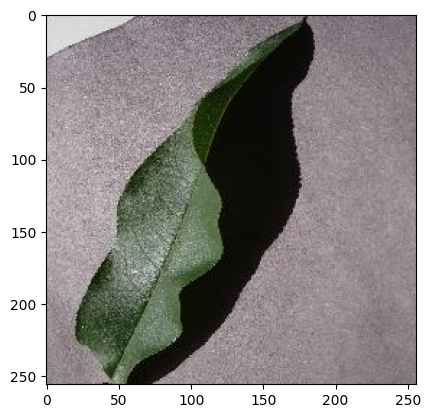

In [19]:
# Exploring the contents
image_path = '/content/plantvillage dataset/color/Peach___healthy/7b7c9e4f-3379-4a0a-9c94-5d9458653707___Rutg._HL 2451.JPG'

# Reading Image
img = mpimg.imread(image_path)

print(img.shape)

# Display image
plt.imshow(img)

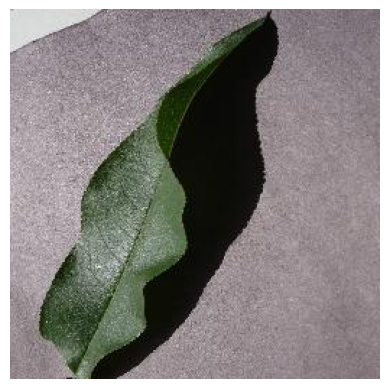

In [20]:
plt.axis('off')
plt.imshow(img)

In [21]:
print(img)

[[[175 177 176]
  [160 162 161]
  [183 185 184]
  ...
  [121 110 118]
  [126 115 123]
  [129 118 126]]

 [[212 214 213]
  [202 204 203]
  [210 212 211]
  ...
  [120 109 117]
  [119 108 116]
  [116 105 113]]

 [[220 222 221]
  [221 223 222]
  [218 220 219]
  ...
  [118 107 115]
  [115 104 112]
  [111 100 108]]

 ...

 [[134 122 126]
  [154 142 146]
  [151 139 143]
  ...
  [134 122 126]
  [139 127 131]
  [131 119 123]]

 [[153 141 145]
  [138 126 130]
  [135 123 127]
  ...
  [135 123 127]
  [136 124 128]
  [124 112 116]]

 [[141 129 133]
  [150 138 142]
  [146 134 138]
  ...
  [138 126 130]
  [135 123 127]
  [121 109 113]]]


In [22]:
#Image Parameters
img_size = 224
batch_size = 32

Train Test Split

In [23]:
# Image Data Generators --- building a pipline --- if for loop used more memory will be consumed -- processed in batch here --- colab or system does not crash --- batch wise leads to less RAM storage used
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2    # using 20% of data for validation
)

In [24]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 44692 images belonging to 39 classes.


In [25]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 11158 images belonging to 39 classes.


Convolutional Neural Network

In [26]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │        10,023 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,415 (182.36 MB)

 Trainable params: 47,805,415 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Model Compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model Training

In [29]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,    # Number of steps per epoch
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size   # Validation steps
  )

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 223/1396 ━━━━━━━━━━━━━━━━━━━━ 2:34 132ms/step - accuracy: 0.2841 - loss: 4.3237

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1396/1396 ━━━━━━━━━━━━━━━━━━━━ 174s 120ms/step - accuracy: 0.5829 - loss: 1.8869 - val_accuracy: 0.8611 - val_loss: 0.4568
Epoch 2/5
   1/1396 ━━━━━━━━━━━━━━━━━━━━ 1:30 65ms/step - accuracy: 0.9375 - loss: 0.1605

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1396/1396 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.9375 - loss: 0.1605 - val_accuracy: 0.8578 - val_loss: 0.4677
Epoch 3/5
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 138s 99ms/step - accuracy: 0.8945 - loss: 0.3336 - val_accuracy: 0.8777 - val_loss: 0.4138
Epoch 4/5
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9062 - loss: 0.2277 - val_accuracy: 0.8801 - val_loss: 0.3961
Epoch 5/5
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 137s 98ms/step - accuracy: 0.9524 - loss: 0.1488 - val_accuracy: 0.8766 - val_loss: 0.4553


Model Evaluation

In [30]:
print('Evaluating model...')
val_loss,val_accuracy = model.evaluate(validation_generator,steps = validation_generator.samples // batch_size)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

Evaluating model...
348/348 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.8691 - loss: 0.4892
Validation Accuracy: 87.66%


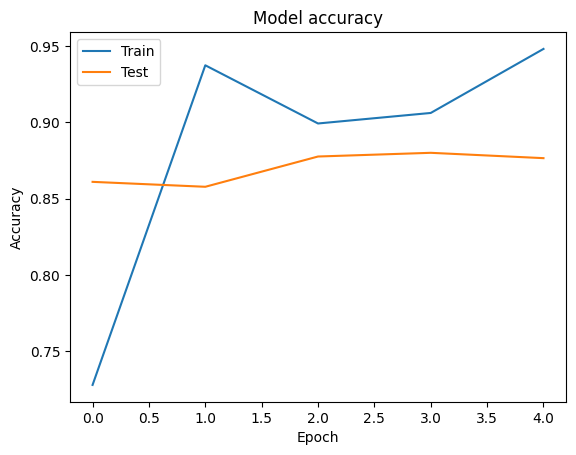

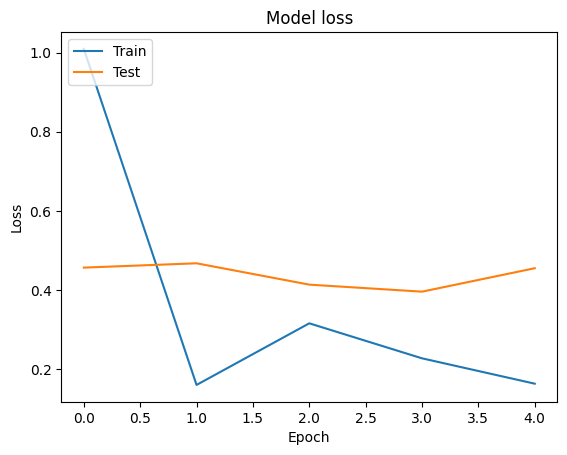

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building Predictive model

In [32]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [33]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [34]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [40]:
# Example Usage
image_path = '/content/apple_black_rot.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class Name: Apple___Black_rot


Saving the model

In [43]:
import pickle
import json
from zipfile import ZipFile
import os
import shutil
from google.colab import drive

# 1. Define the names for the files and the final zip archive
model_filename = 'model.pkl'
class_indices_filename = 'class_indices.json'
zip_filename = 'plant_disease_model.zip'

# 2. Save the model and class indices as individual files
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

with open(class_indices_filename, 'w') as file:
    json.dump(class_indices, file)

# 3. Create a new zip file and write the other two files into it
with ZipFile(zip_filename, 'w') as zipf:
    zipf.write(model_filename)
    zipf.write(class_indices_filename)

print(f"'{zip_filename}' created successfully.")

# 4. Save the final zip file to your Google Drive
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/Plant_Disease_Detection/'
os.makedirs(drive_path, exist_ok=True)
# shutil.move(zip_filename, os.path.join(drive_path, zip_filename))

print(f"'{zip_filename}' moved to your Google Drive.")

'plant_disease_model.zip' created successfully.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'plant_disease_model.zip' moved to your Google Drive.
